In [1]:
from moduls.load_data import DataMenager
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Ładowanie danych

In [2]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases'
DATA_LOCATION = '/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
DATA_URL = DOWNLOAD_ROOT + DATA_LOCATION
DATA_PATH = 'data_set'

In [3]:
'''
Nadanie kolumną odpowiednich nazw 
względem podanych informacji na stronie w pliku heart-disease.names:
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
'''
columns = ['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 
           'single_epithelial_cell_size','bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',
           'target']
#Definicja kolumn z wartościmi dyskretnymi i ciągłymi 
num_col = columns[:-1]
cat_col = columns[-1:]

In [4]:
dm = DataMenager(DATA_PATH, DATA_URL)# Tworzenie istancji własnej klasy

In [5]:
#Pobranie danych ze strony UCI
dm.fetch_data_from_web('raw_BreastCancerWisconsin.csv')
raw_df = dm.load_raw_data('raw_BreastCancerWisconsin.csv', columns)

In [6]:
df = raw_df.copy()

# Sprawdzanie ogólnych informacj o danych

In [7]:
#Rozmiar zestawu danych
df.shape

(699, 11)

In [8]:
#Przegląd zawartości zestawu danych 
df.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,target
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
del df['id']
num_col.remove('id')
print('Atrybut id został usunięty')

Atrybut id został usunięty


In [10]:
#Ogólne inforamcje o zestawie danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              699 non-null    int64 
 1   uniformity_of_cell_size      699 non-null    int64 
 2   uniformity_of_cell_shape     699 non-null    int64 
 3   marginal_adhesion            699 non-null    int64 
 4   single_epithelial_cell_size  699 non-null    int64 
 5   bare_nuclei                  699 non-null    object
 6   bland_chromatin              699 non-null    int64 
 7   normal_nucleoli              699 non-null    int64 
 8   mitoses                      699 non-null    int64 
 9   target                       699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Usuwanie

In [11]:
#Sprawdzanie czy istnieją braki w danch
df.isnull().sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
target                         0
dtype: int64

In [12]:
#Sprawdzenie szczegółowe zawartości kolumn typu object
print(df['bare_nuclei'].value_counts())

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64


In [13]:
print(df['target'].value_counts())

2    458
4    241
Name: target, dtype: int64


In [14]:
def decoding_data_hd(df):
    '''
    Metoda służąca do roszywrowanie
    wartosći znajdąjących się w danych
    hear disease na podstawie pliku
    hear-disease.name, oraz wartości nieznane
    zakodowanie jako NaN
    '''
    transformationDict = {2: 0, 4: 1}
    df['target'] = df['target'].map(transformationDict)
    
    df.loc[df['bare_nuclei'].str.contains('\?'),'bare_nuclei'] = np.nan

In [15]:
#Transformacja danych
decoding_data_hd(df)
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,target
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [16]:
#Sprawdzenie braków ponownie
df.isnull().sum()

clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
target                          0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')
df['target'] = df['target'].astype('category')

<AxesSubplot:>

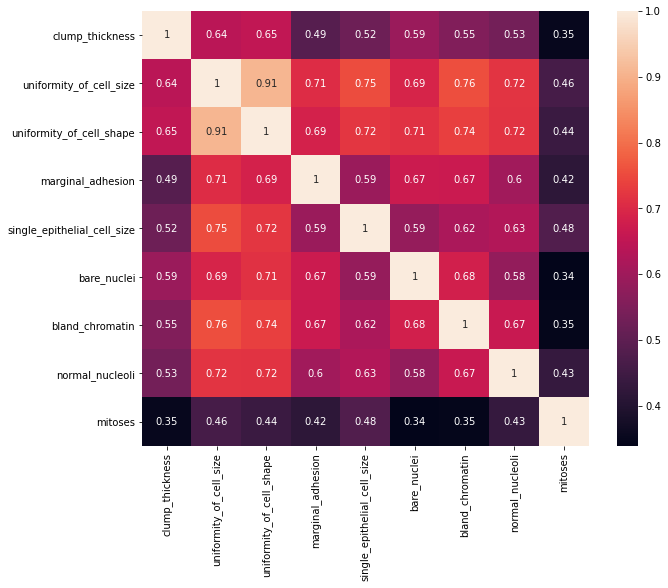

In [19]:
#Badanie korelacji między danymi
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

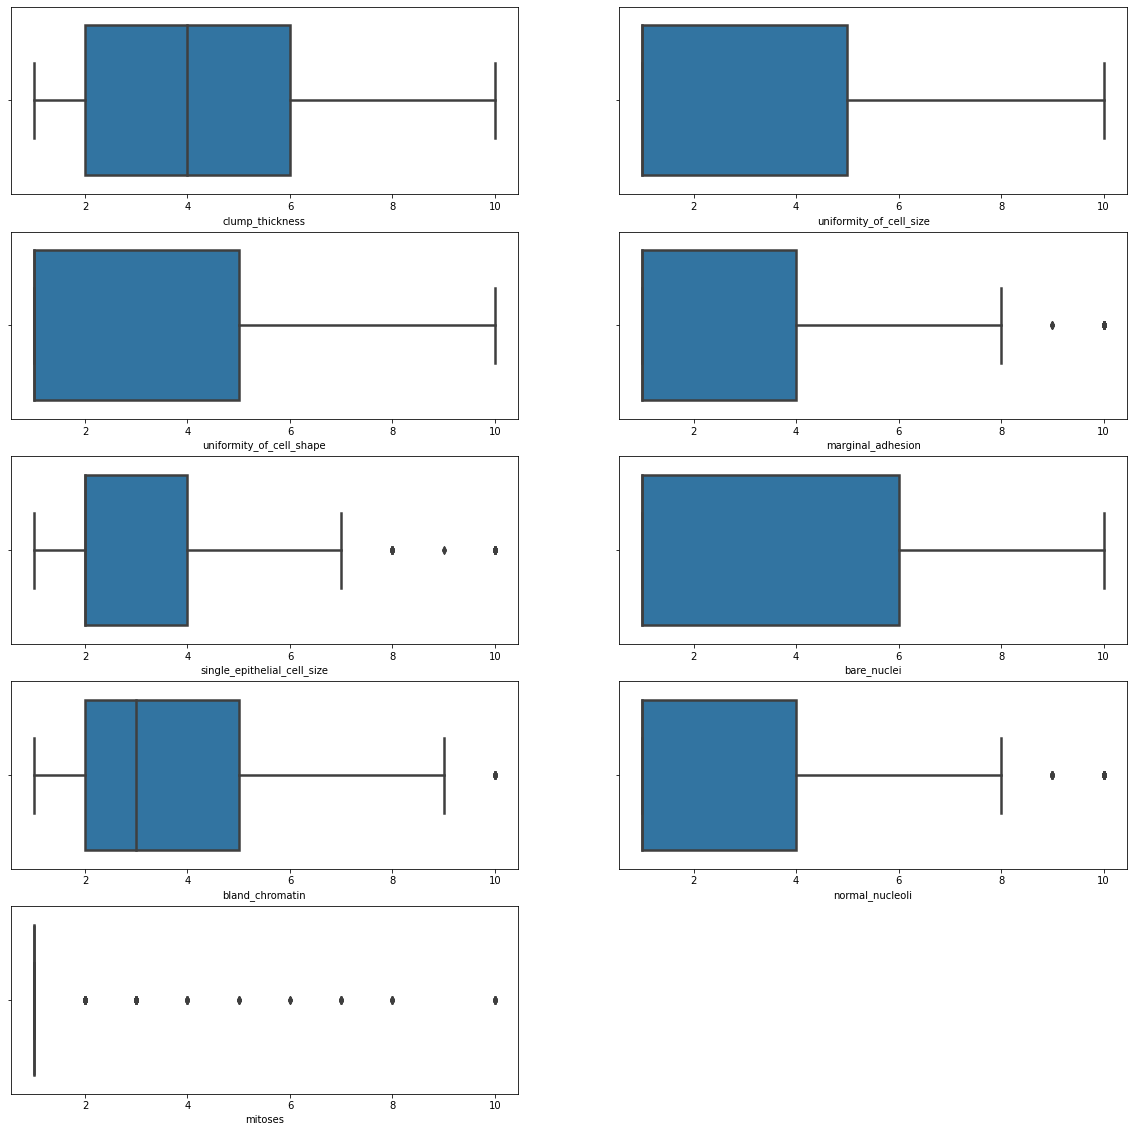

In [21]:
#Sprawdzanie rozrzutu danych
plt.figure(figsize=(20,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=feature, data=df, linewidth=2.5)

# Opis danych 

## Opis danych dyskretnych

In [21]:
#Opis danych dyskretnych
df.describe(include=['category']).T

,count,unique,top,freq
target,683,2,0,444


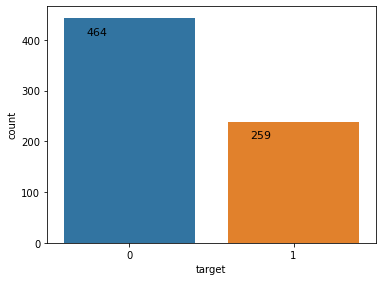

In [22]:
#Wykresy 
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    ax = sns.countplot(x=feature,data=df)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()+20}', 
                        (p.get_x()+0.2, p.get_height()+5),
                        ha='center', va='top', color='black', size=11)

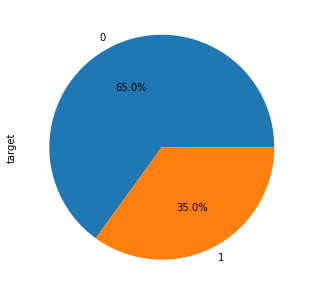

In [23]:
#Wykres kołowy służaący do reprezentacji stosunku
plt.figure(figsize=(20,30))
for i,feature in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    df[feature].value_counts().plot(kind='pie', autopct="%.1f%%")

## Opis danych ciągłych

In [24]:
#Opis danych
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
uniformity_of_cell_size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
uniformity_of_cell_shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
bland_chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0


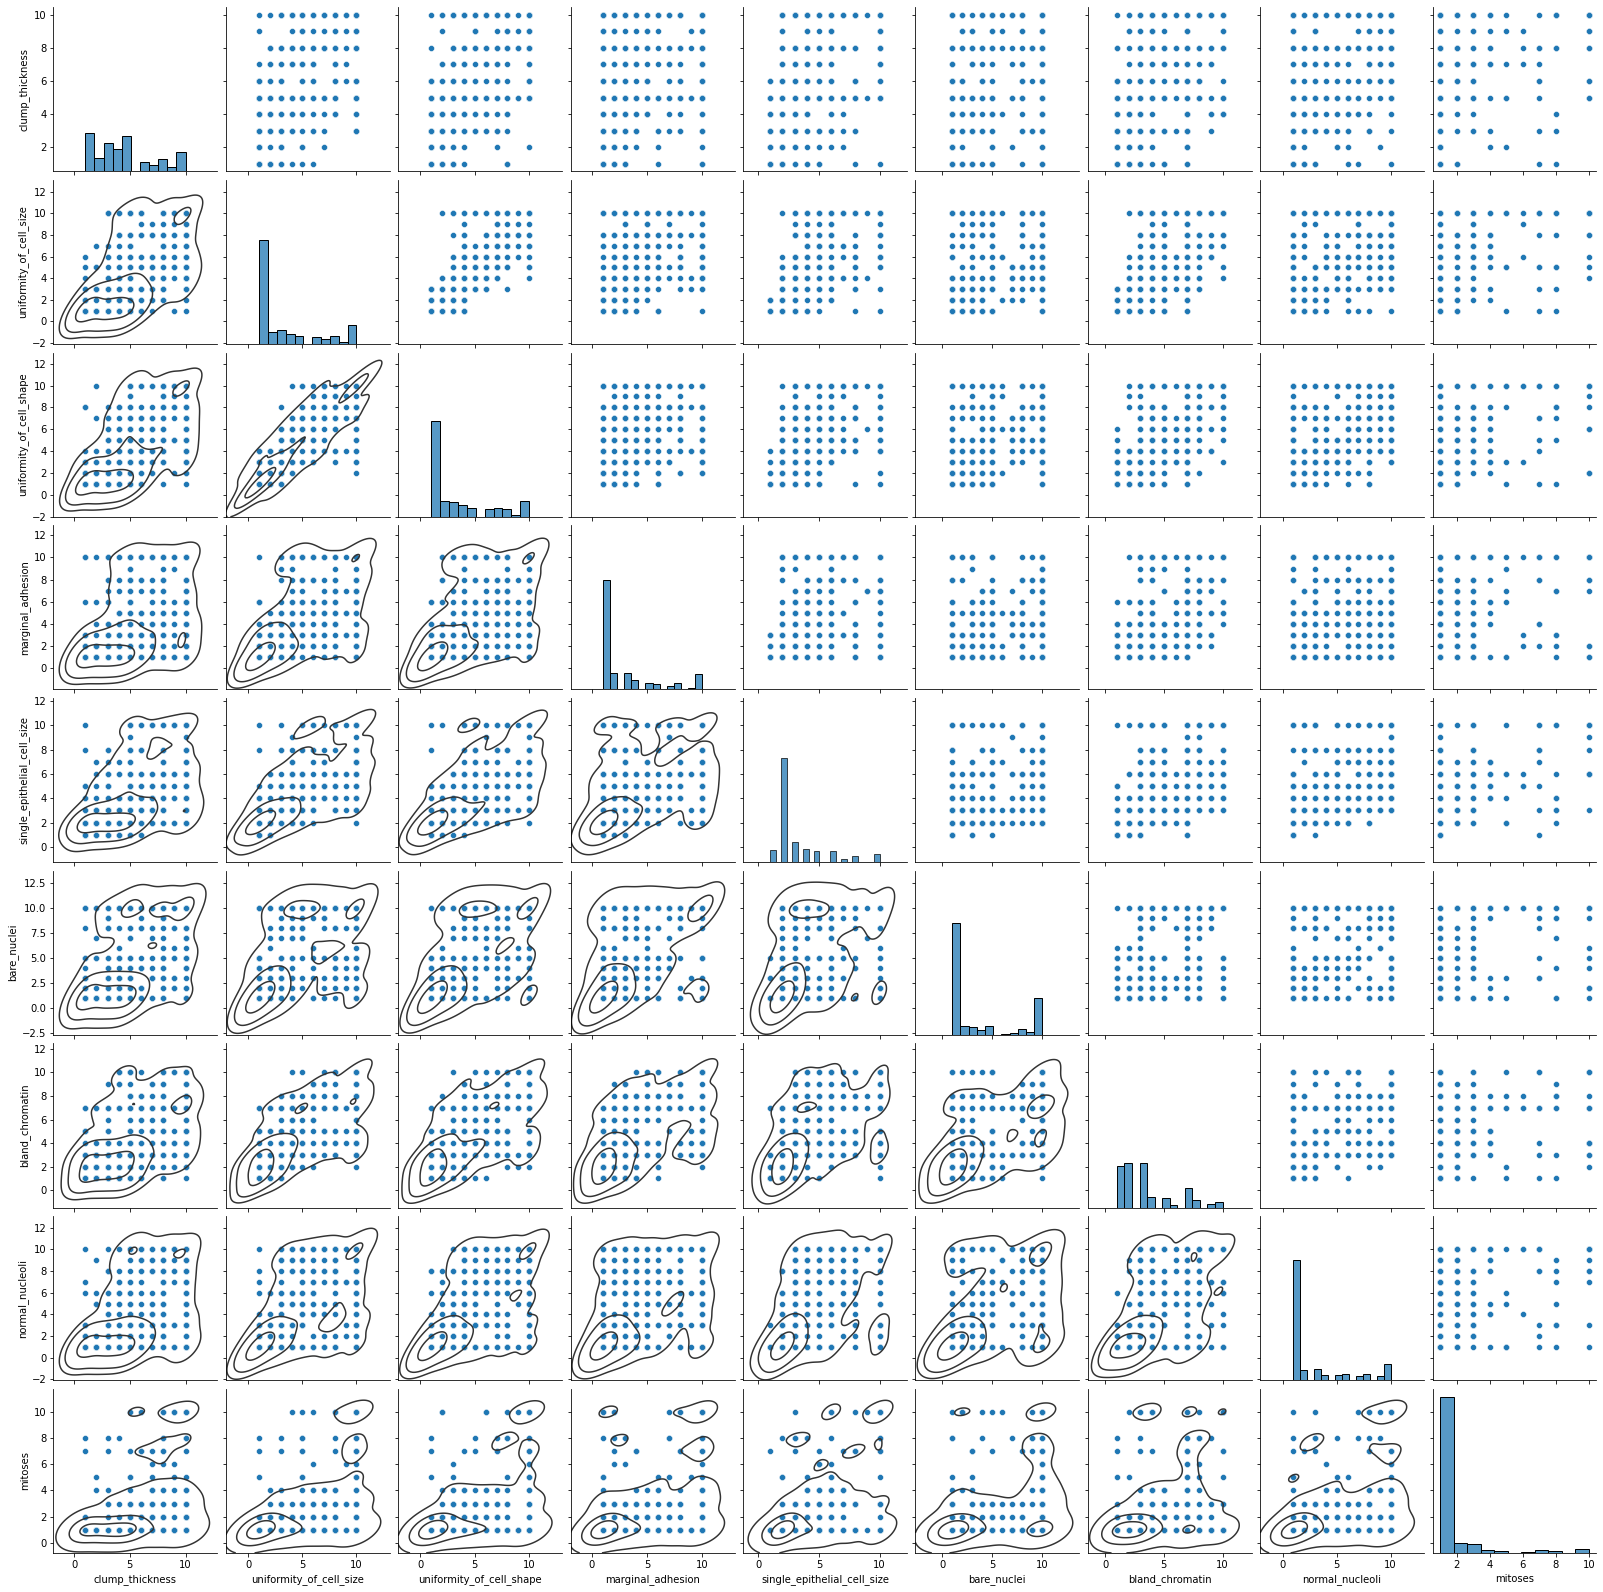

In [25]:
#Wykres reprezentujący rozkład danych ciągłych
g = sns.pairplot(df, diag_kind="hist", height=2.5)
g.map_lower(sns.kdeplot, levels=4, color=".2")

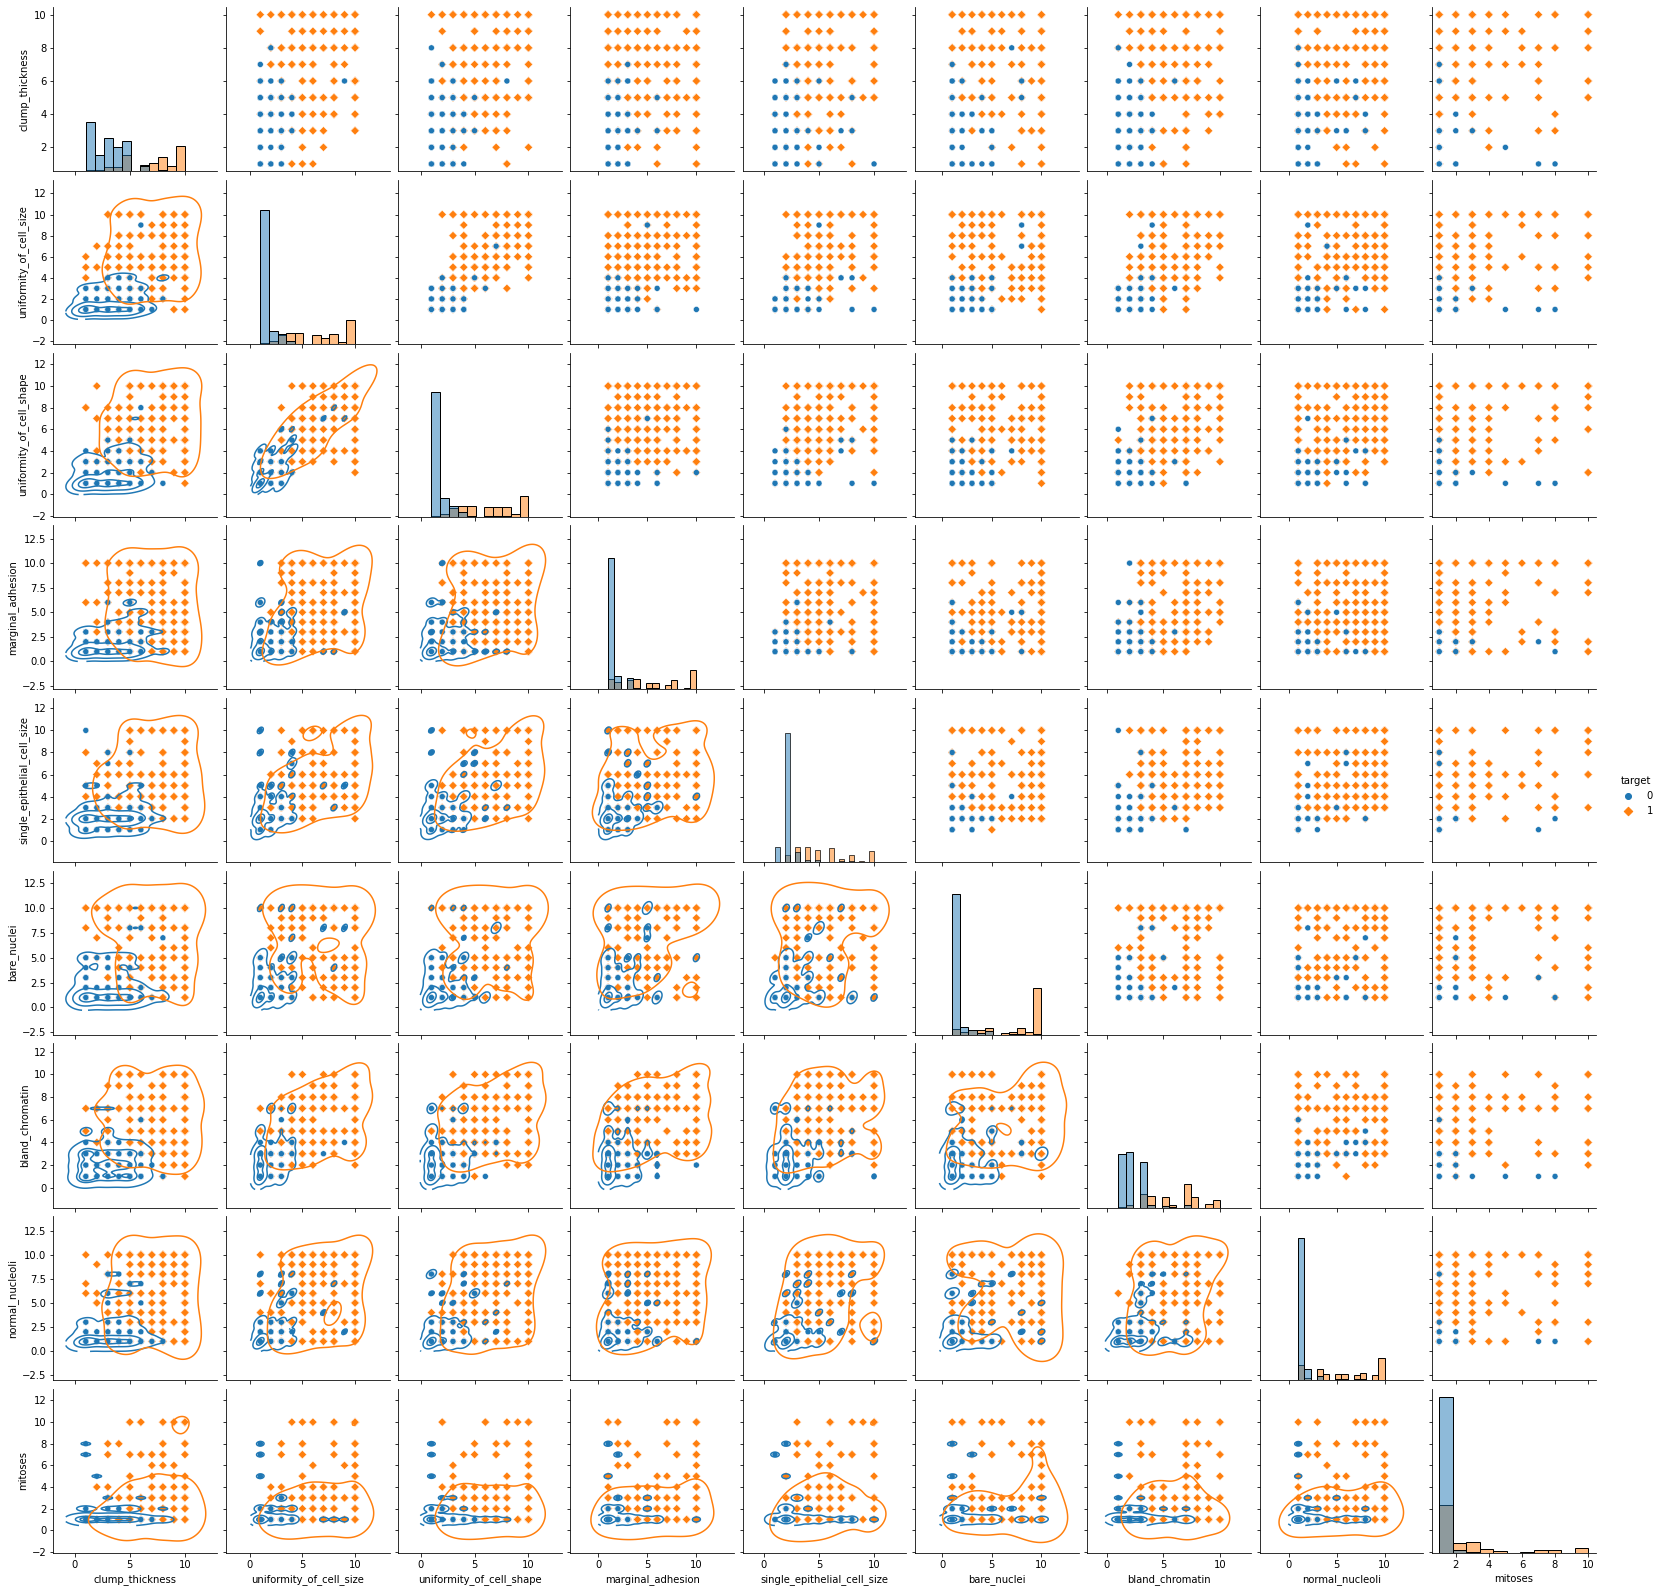

In [26]:
#Wykres reprezentujący rozkład danych ciągłych względem targetu
t = sns.pairplot(df, hue='target', diag_kind="hist", markers=["o", "D"], height=2.5)
t.map_lower(sns.kdeplot, levels=4, color=".2")

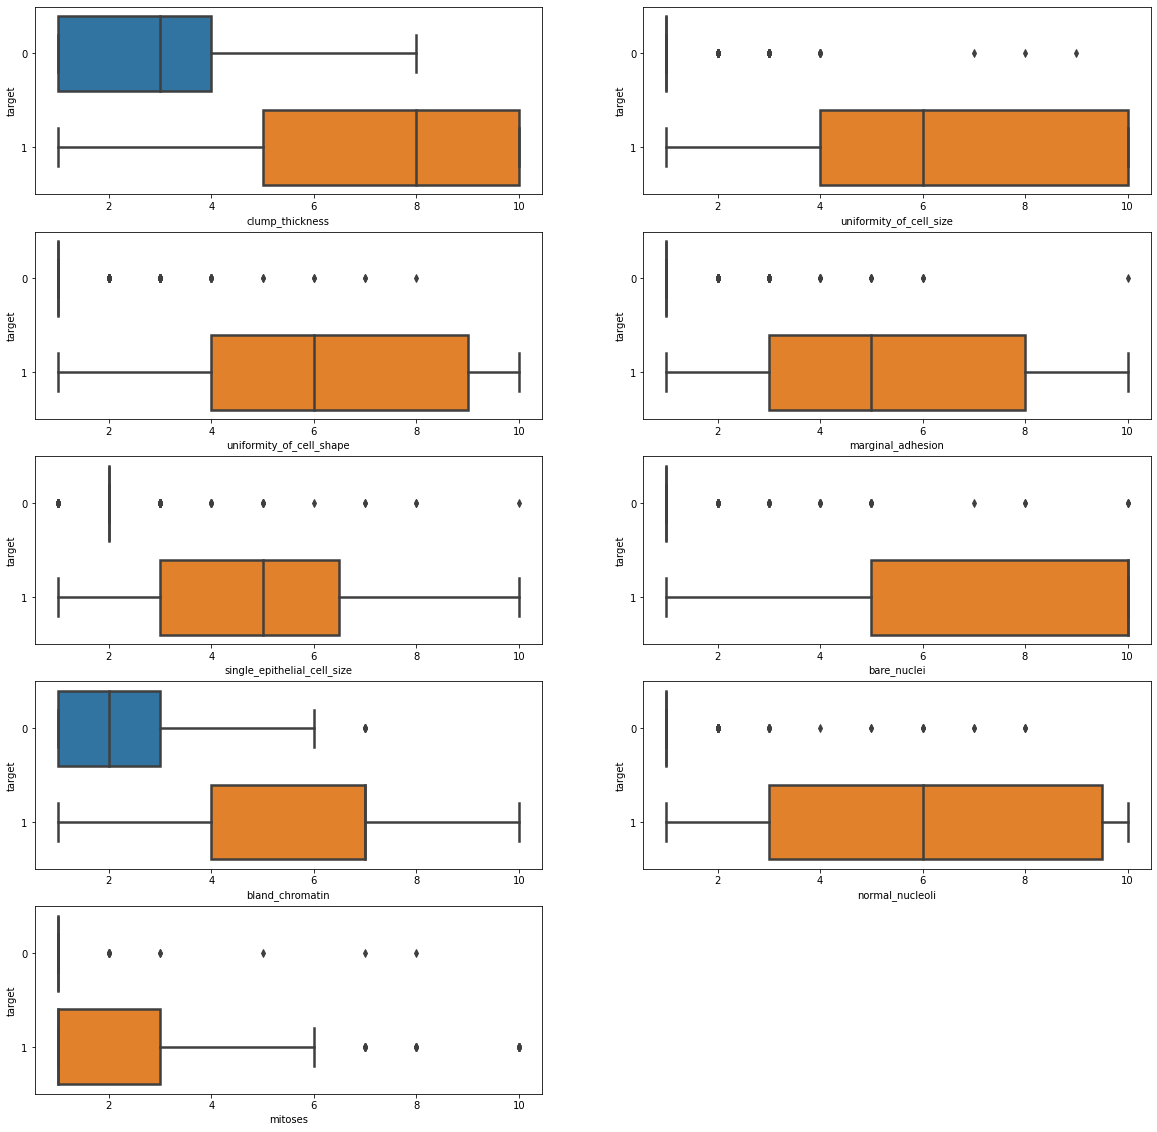

In [27]:
#Rozrzut danych względem targetu
plt.figure(figsize=(20,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=feature, y='target',  data=df, linewidth=2.5)

# Zapisanie danych 

In [28]:
#Zapisanie danych do pliku csv
dm.uploade_data(df,'BreastCancerWisconsin_dataSet.csv')